<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [44]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from numpy import percentile

Load the dataset into a dataframe.


In [21]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")


0            4
1            9
2           13
3           16
4           17
         ...  
11393    25136
11394    25137
11395    25138
11396    25141
11397    25142
Name: Respondent, Length: 11398, dtype: int64

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


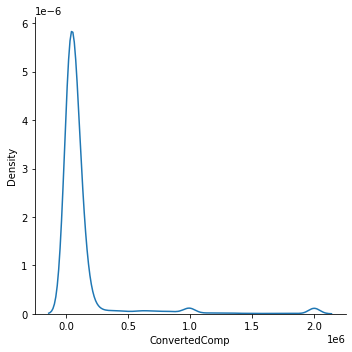

In [16]:
# your code goes here
sns.displot(df.ConvertedComp,kind="kde")


Plot the histogram for the column `ConvertedComp`.


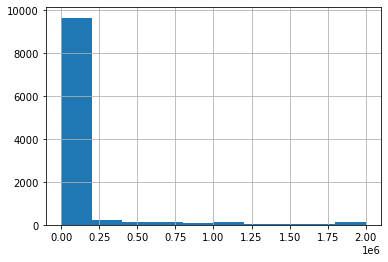

In [17]:
# your code goes here
df.ConvertedComp.hist();

What is the median of the column `ConvertedComp`?


In [19]:
# your code goes here
df.ConvertedComp.median()

57745.0

How many responders identified themselves only as a **Man**?


In [29]:
# your code goes here
df['Gender'].value_counts()['Man']

10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [33]:
# your code goes here
df[df.Gender=='Woman'].ConvertedComp.median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [55]:
df.Age = df.Age.fillna(df.Age.median())
df.Age.isnull().sum()


0

In [56]:
# your code goes here
quartiles = percentile(df.Age, [25, 50, 75])
# calculate min/max
data_min, data_max = df.Age.min(), df.Age.max()
print('Min: %.3f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % data_max)


Min: 16.000
Q1: 26.000
Median: 29.000
Q3: 34.000
Max: 99.000


Plot a histogram of the column `Age`.


<AxesSubplot:>

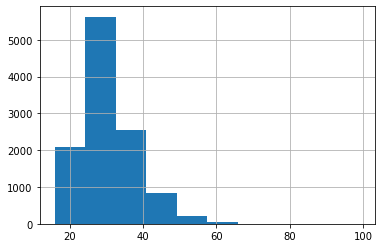

In [57]:
# your code goes here
df.Age.hist()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<AxesSubplot:>

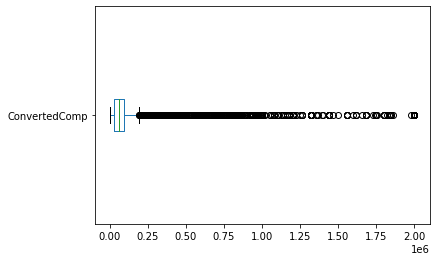

In [58]:
# your code goes here
df['ConvertedComp'] = df['ConvertedComp'].fillna(df['ConvertedComp'].median())
df['ConvertedComp'].plot(kind = 'box',vert = False)

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [64]:
# your code goes here
Q1,Q2,Q3 = percentile(df['ConvertedComp'], [25, 50, 75])
IQR = Q3-Q1
IQR

65984.0

Find out the upper and lower bounds.


In [67]:
# your code goes here

L = Q1 - 1.5 * IQR 
U = Q3 + 1.5 * IQR 
L,U

(-69960.0, 193976.0)

Identify how many outliers are there in the `ConvertedComp` column.


In [69]:
# your code goes here
((df.ConvertedComp < (L)) | (df.ConvertedComp > (U))).sum()

933

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [75]:
# your code goes here
data_clean = df[~((df.ConvertedComp < (L)) | (df.ConvertedComp > (U)))]
data_clean.shape,df.shape

((10465, 85), (11398, 85))

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [77]:
# your code goes here
import scipy as sp


 

corrrelation    = df.corr(method="pearson");

print("Pearson correlation coefficient:");

print(corrrelation);

 

corrrelation    = df.corr(method="kendall");

print("Kendall Tau correlation coefficient:");

print(corrrelation);

 

corrrelation    = df.corr(method="spearman");

print("Spearman rank correlation:");

print(corrrelation);

Pearson correlation coefficient:
               Respondent  CompTotal  ConvertedComp  WorkWeekHrs  CodeRevHrs  \
Respondent       1.000000  -0.013490       0.002468    -0.015314    0.004621   
CompTotal       -0.013490   1.000000       0.001031     0.003510    0.007063   
ConvertedComp    0.002468   0.001031       1.000000     0.020489   -0.034760   
WorkWeekHrs     -0.015314   0.003510       0.020489     1.000000    0.026517   
CodeRevHrs       0.004621   0.007063      -0.034760     0.026517    1.000000   
Age              0.004282   0.007190       0.101777     0.036897   -0.021086   

                    Age  
Respondent     0.004282  
CompTotal      0.007190  
ConvertedComp  0.101777  
WorkWeekHrs    0.036897  
CodeRevHrs    -0.021086  
Age            1.000000  
Kendall Tau correlation coefficient:
               Respondent  CompTotal  ConvertedComp  WorkWeekHrs  CodeRevHrs  \
Respondent       1.000000  -0.006608       0.006257    -0.005287    0.000177   
CompTotal       -0.006608  

In [80]:
for col,val in df.dtypes:
    print (val,col)
# sns.heatmap(df)

TypeError: cannot unpack non-iterable numpy.dtype object

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
